# Linear Regression

from Course: Databases and algorithms

In [5]:
from __future__ import division    # do not round to int
from collections import Counter
import math
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def printf(format, *args):
    sys.stdout.write(format % args)

def mean(x):     
    return sum(x) / len(x)


def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def de_mean(x):    
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""    
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1) 

def standard_deviation(x):    
    return math.sqrt(variance(x))

def covariance(x, y):    
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

# what the model should do

def predict(alpha, beta, x_i):
    return beta*x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict3(alpha, beta, x_i)

def sum_of_squared_error(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x,y))

def least_squares_fit(x, y):
    # skip the math ...
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta*mean(x)
    return alpha, beta

In [19]:
data = pd.read_csv('data.csv', sep=';')

In [26]:
print(data)

       Origin Destination  Distance Duration
0      London   Amsterdam       365    01:10
1      London    Budapest      1462    02:20
2      London  Bratislava      1285    02:15
3  Bratislava       Paris      1096    02:05
4  Bratislava      Berlin       517    01:15
5      Vienna      Dublin      1686    02:50
6      Vienna   Amsterdam       932    01:55
7   Amsterdam    Budapest      1160    02:10
8  Bratislava   Amsterdam       978      NaN


In [27]:
data.Duration = pd.to_datetime(data.Duration, format='%H:%M')

In [28]:
# convert into Datetime format
t = data.Duration[0]
a = pd.to_datetime(t, format='%H:%M')

0   1900-01-01 01:10:00
1   1900-01-01 02:20:00
2   1900-01-01 02:15:00
3   1900-01-01 02:05:00
4   1900-01-01 01:15:00
5   1900-01-01 02:50:00
6   1900-01-01 01:55:00
7   1900-01-01 02:10:00
8                   NaT
Name: Duration, dtype: datetime64[ns]

In [60]:
# calculate duration in minutes and make minutes vector
duration_min = []
for index, row in data.iterrows():
     duration_min.append(data.Duration[index].hour * 60 + data.Duration[index].minute)

[70, 140, 135, 125, 75, 170, 115, 130, nan]


In [63]:
# make distance vector
distance = []
for index, row in data.iterrows():
     distance.append(data.Distance[index])

[365, 1462, 1285, 1096, 517, 1686, 932, 1160, 978]


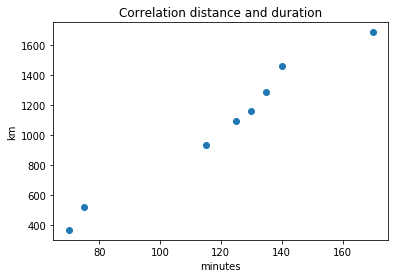

In [64]:
plt.scatter(duration_min, distance)
plt.title("Correlation distance and duration")
plt.xlabel("minutes")
plt.ylabel("km")

plt.show()

In [127]:
# substract 40 minutes for start and landing, considered constant
duration_forecast = [x - 40 for x in duration_min[:-1]]

In [128]:
# estimation parameters alpha and beta
alpha, beta = least_squares_fit(distance[:-1], duration_forecast)

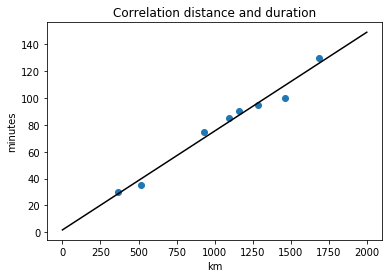

In [133]:
plt.scatter(distance[:-1], duration_forecast)
plt.title("Correlation distance and duration")
plt.xlabel("km")
plt.ylabel("minutes")

# [x1, x2], [y1, y2]
plt.plot([0,2000],[alpha,predict(alpha,beta,2000)], 'k-')

plt.show()

In [150]:
# Forecast für InFlight Time
x = predict(alpha,beta,distance[-1])

73.75476766651506

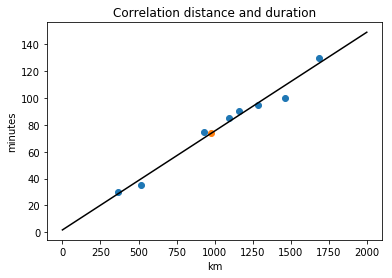

In [151]:
plt.scatter(distance[:-1], duration_forecast)
plt.scatter(distance[-1], x)
plt.title("Correlation distance and duration")
plt.xlabel("km")
plt.ylabel("minutes")

# [x1, x2], [y1, y2]
plt.plot([0,2000],[alpha,predict(alpha,beta,2000)], 'k-')

plt.show()